In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import load_model

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
def plot_loss(df , WS, NN):
  plt.plot(df['loss'])
  plt.plot(df['val_loss'])
  plt.title(f'Loss vs Accuracy Graph_{WS}_{NN}')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'],loc='upper right')
  #plt.savefig(f'/mydrive/dataset/Saved Images Final/bOO/{abc}.png',bbox_inches="tight",dpi=520)
  #make sure plt,=.savefig is before
  plt.show()

In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, Window_Size):
  dataX, dataY = [], []
  for i in range(len(dataset) - Window_Size):
    dataX.append(dataset[i : (i + Window_Size), 0])
    dataY.append(dataset[i + Window_Size, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
def plot_result(Y_Test, Y_Pred):

  plt.figure(figsize=(20,10))
  plt.plot(Y_Test, label='Actual Bitcoin Price')
  plt.plot(Y_Pred, label='Predicted Bitcoin Price')

  plt.xlabel('1 Hrs Time Intervals')
  plt.ylabel('Bitcoin Price')

  plt.legend()
  plt.show()

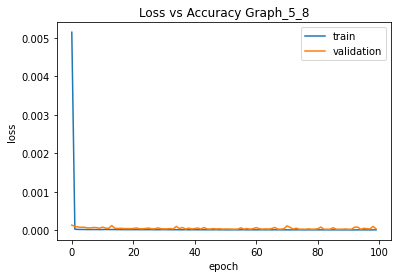

_______



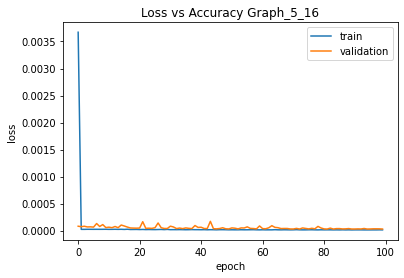

_______



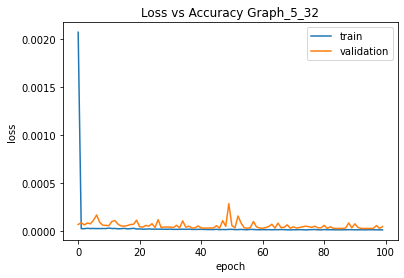

_______



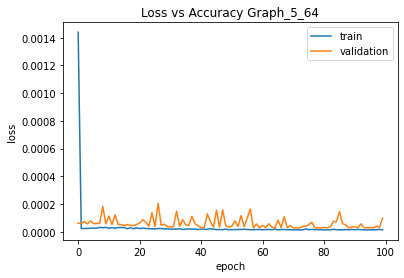

_______



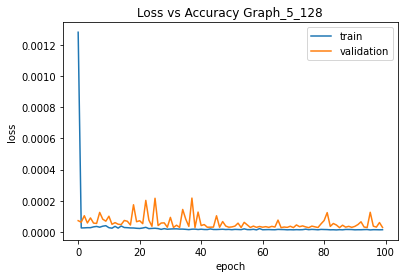

_______



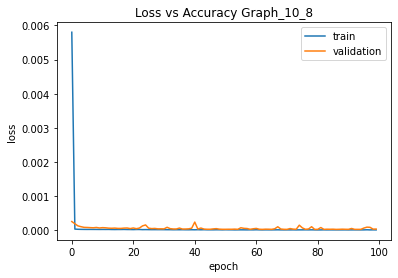

_______



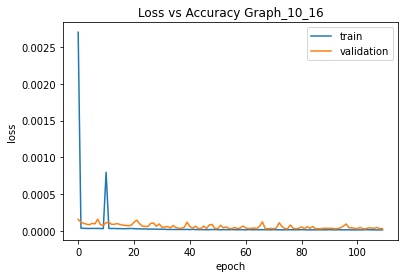

_______



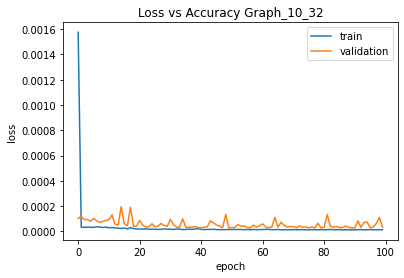

_______



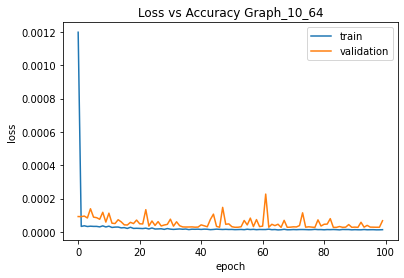

_______



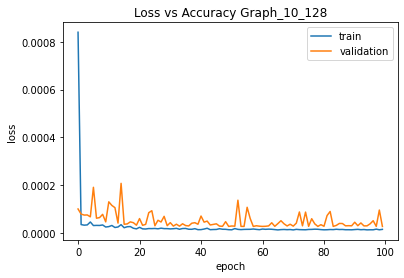

_______



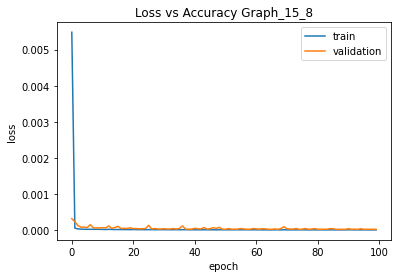

_______



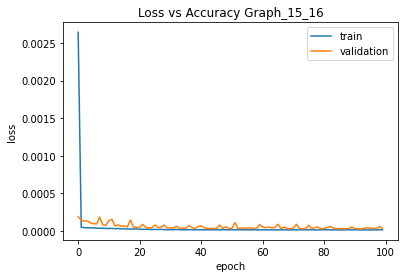

_______



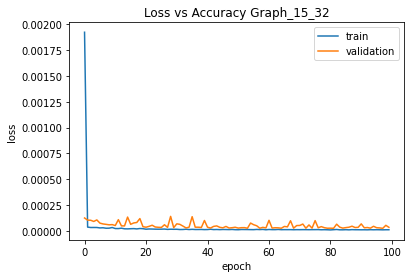

_______



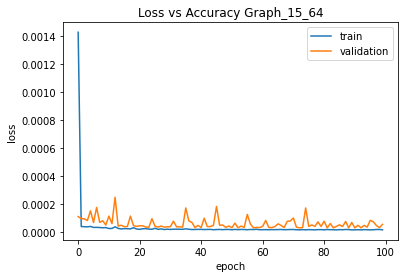

_______



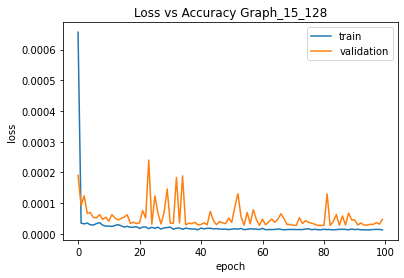

_______



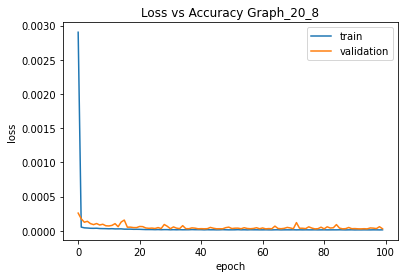

_______



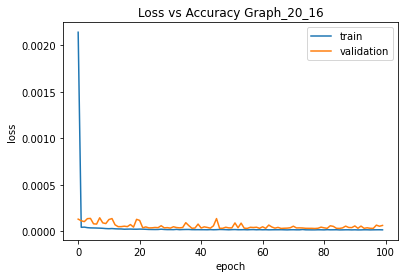

_______



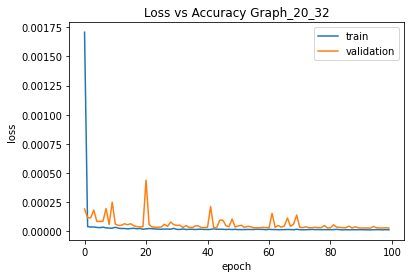

_______



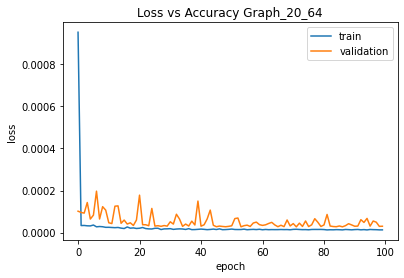

_______



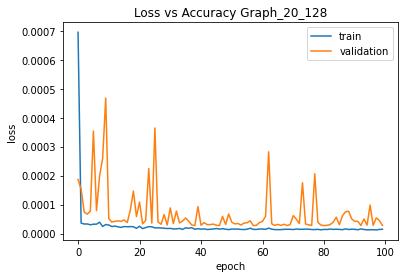

_______



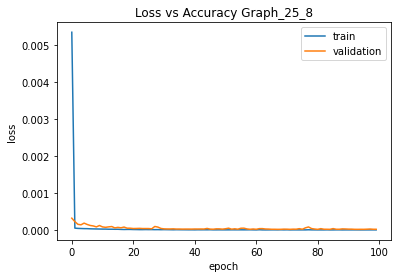

_______



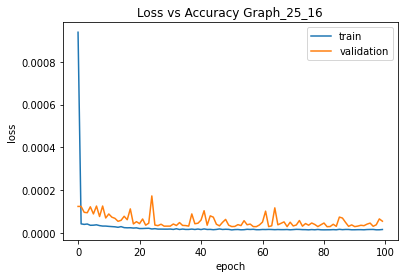

_______



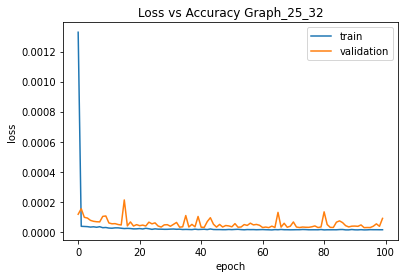

_______



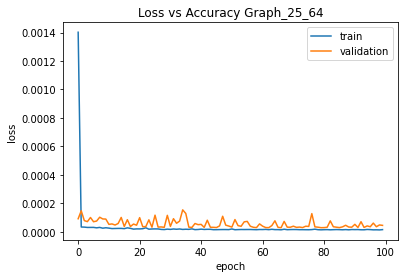

_______



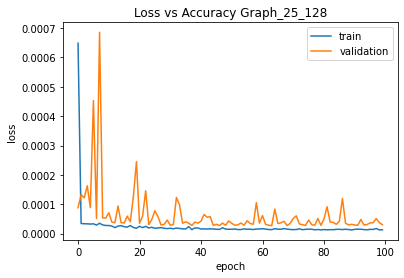

_______



In [ ]:
ws = 5

val_i = 5
val_j = 5

for i in range(val_i):
  nn = 8
  for j in range(val_j):
    maindf = pd.read_csv(f'/content/gdrive/MyDrive/Thesis/Logs/CNN_LSTM_History_WS{ws}_Neuron{nn}.csv')
    plot_loss(df=maindf,WS=ws,NN=nn)
    print('_______')
    print('')
    nn=nn*2
  
  ws = ws+5

In [ ]:
testdf = pd.read_csv('/content/Test_Jan22 to.csv')

In [ ]:
test_prices = pd.to_numeric(testdf['close'], errors='coerce').values.reshape(-1,1)

scaler=MinMaxScaler(feature_range=(0,1))
model_test_input=scaler.fit_transform(testdf['close'].values.reshape(-1,1))

In [ ]:
#datam = []
def test_model(window_size, Model, Neuron):
  datam = []
  x_test, y_test=create_dataset(dataset=model_test_input, Window_Size=window_size)

  print(x_test.shape)
  print(y_test.shape)

  x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
  print(x_test.shape)
  y_test = y_test.reshape(-1,1)
  y_test = scaler.inverse_transform(y_test)
  print(y_test.shape)

  y_pred = Model.predict(x_test)
  y_pred = scaler.inverse_transform(y_pred)

  RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
  MSE = mean_squared_error(y_test,y_pred)
  MAE = mean_absolute_error(y_test,y_pred)
  MAPE = mean_absolute_percentage_error(y_test,y_pred)*100

  print(f"Window Size: {window_size} Neurons: {Neuron}")
  print('')
  plot_result(y_test, y_pred)
  print("Test data RMSE: ", RMSE)
  print("Test data MSE: ", MSE)
  print("Test data MAE: ", MAE)
  print("Test data MAPE: ", MAPE)
  print("_____________________________________")

  datam.extend((window_size, Neuron, RMSE, MSE, MAE, MAPE))
  
  return datam

(5671, 5)
(5671,)
(5671, 5, 1)
(5671, 1)
Window Size: 5 Neurons: 8



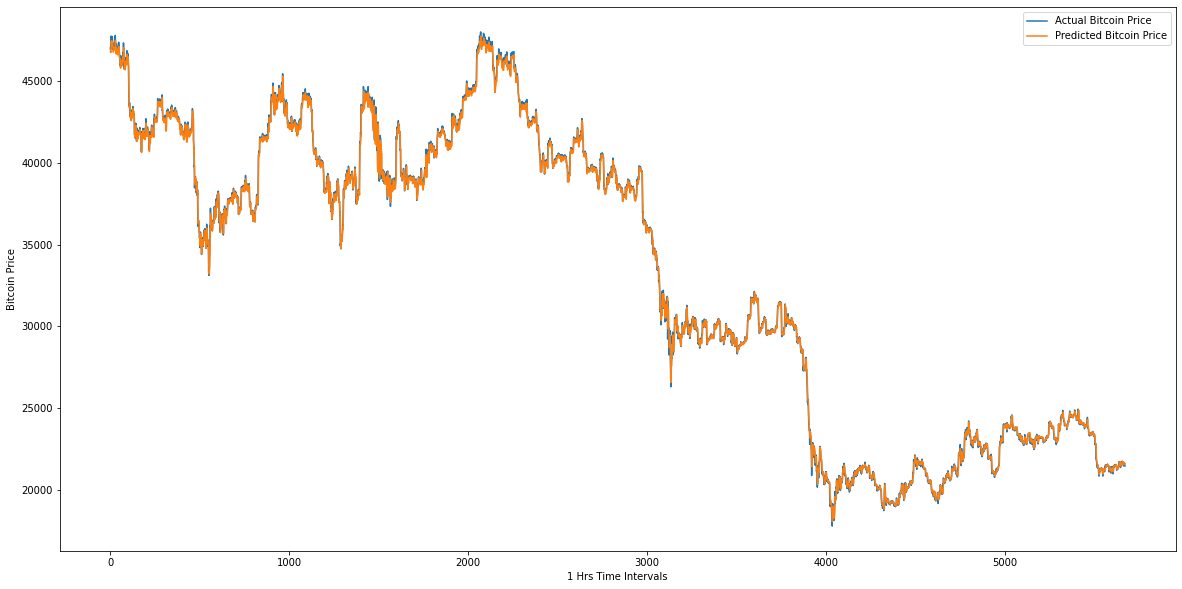

Test data RMSE:  288.9116201380913
Test data MSE:  83469.92425081675
Test data MAE:  185.1868990532975
Test data MAPE:  0.5652956557137242
_____________________________________
_______

(5671, 5)
(5671,)
(5671, 5, 1)
(5671, 1)
Window Size: 5 Neurons: 16



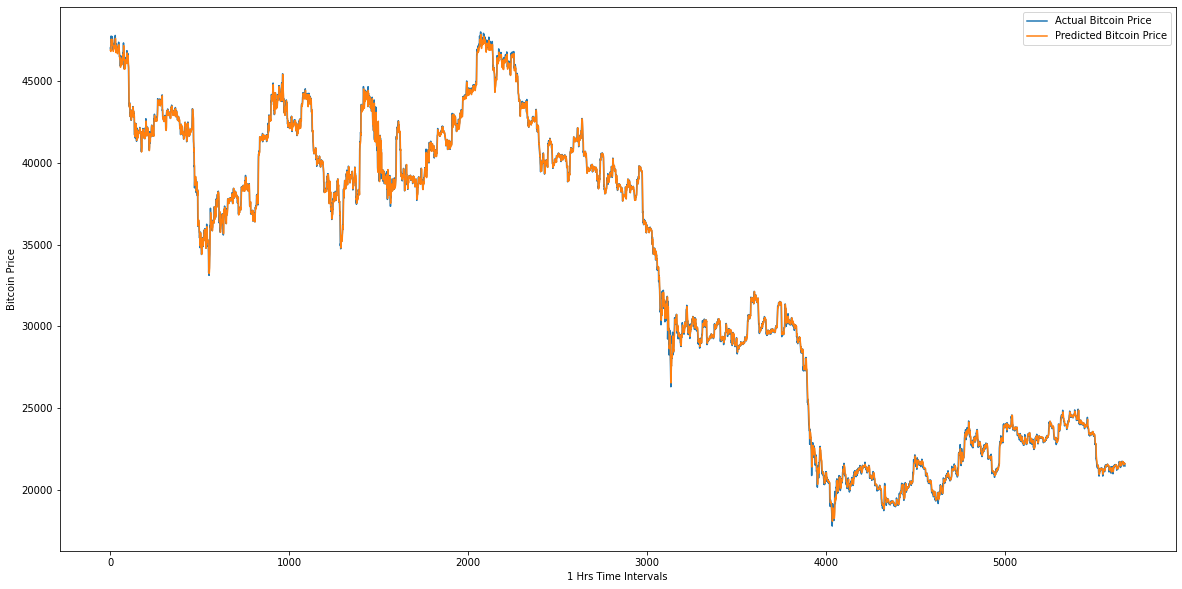

Test data RMSE:  282.29479917285823
Test data MSE:  79690.35364004436
Test data MAE:  174.7213347739596
Test data MAPE:  0.5402683998450756
_____________________________________
_______

(5671, 5)
(5671,)
(5671, 5, 1)
(5671, 1)
Window Size: 5 Neurons: 32



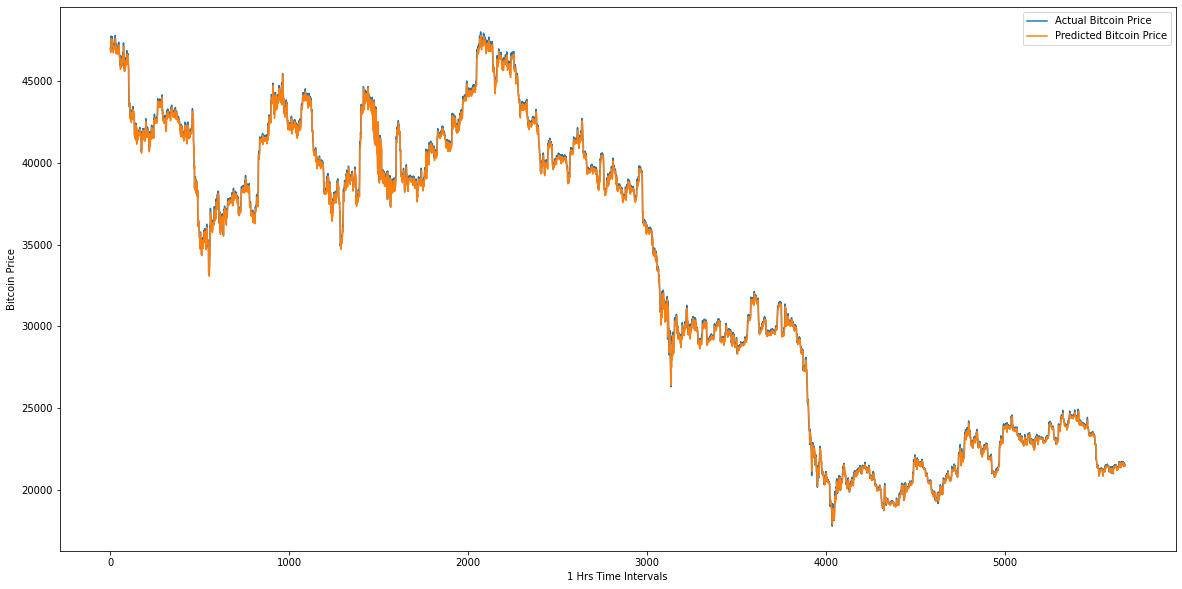

Test data RMSE:  299.6482221873333
Test data MSE:  89789.05706002949
Test data MAE:  198.85678811893843
Test data MAPE:  0.6017923596351578
_____________________________________
_______

(5671, 5)
(5671,)
(5671, 5, 1)
(5671, 1)
Window Size: 5 Neurons: 64



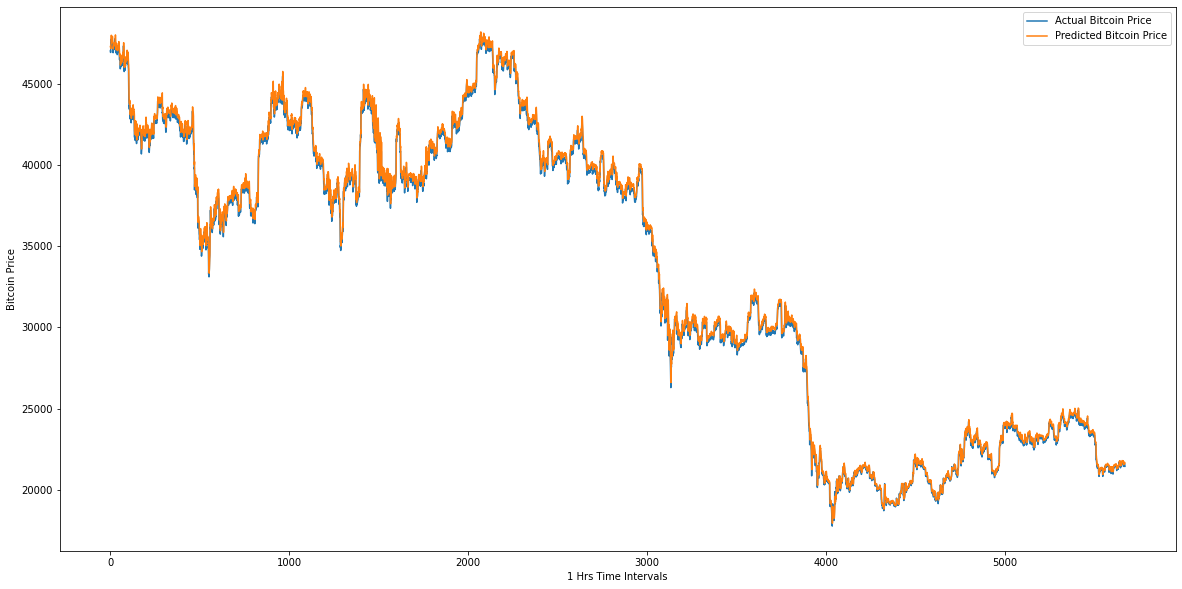

Test data RMSE:  362.2444354278648
Test data MSE:  131221.0309984525
Test data MAE:  269.9781503570799
Test data MAPE:  0.8098016297601849
_____________________________________
_______

(5671, 5)
(5671,)
(5671, 5, 1)
(5671, 1)
Window Size: 5 Neurons: 128



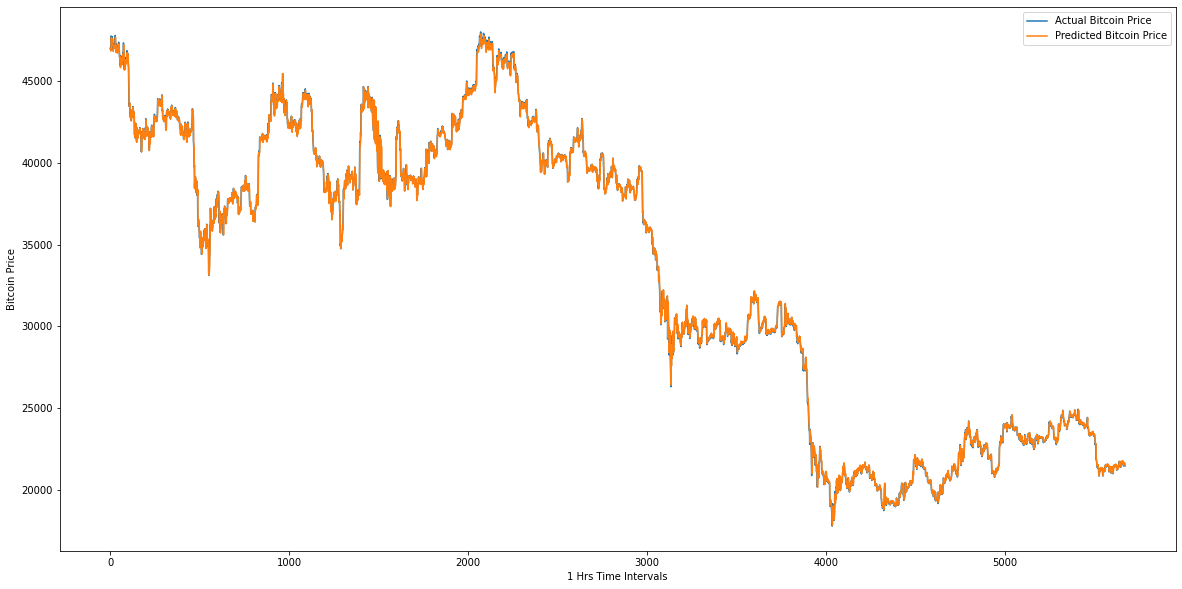

Test data RMSE:  279.14177355335033
Test data MSE:  77920.12974250992
Test data MAE:  171.1519760392788
Test data MAPE:  0.523621290942688
_____________________________________
_______

(5666, 10)
(5666,)
(5666, 10, 1)
(5666, 1)
Window Size: 10 Neurons: 8



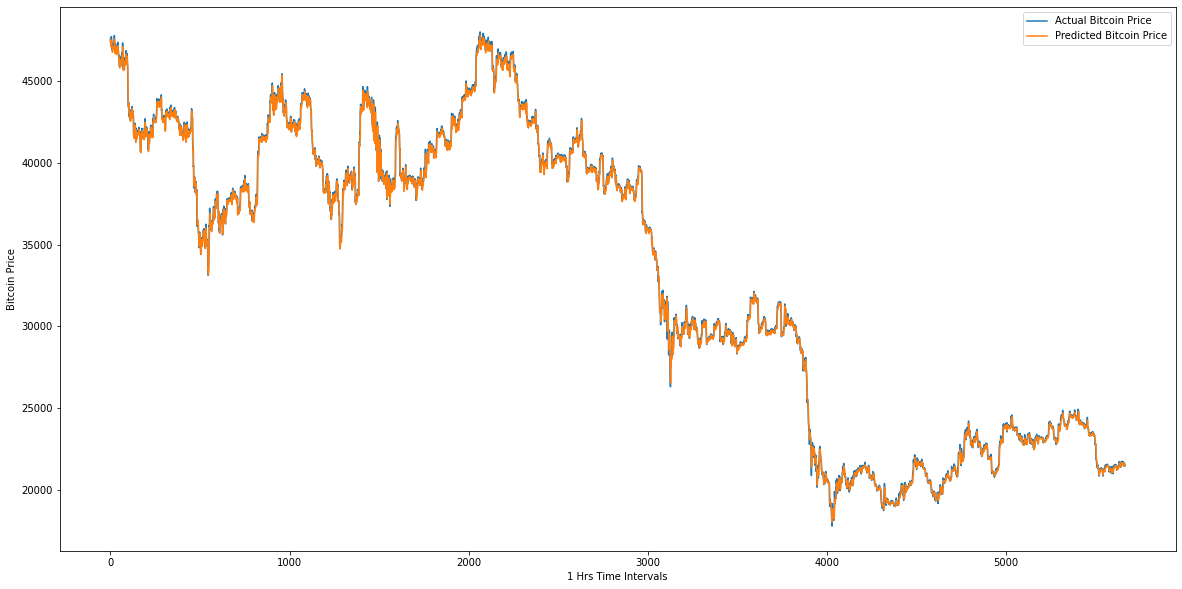

Test data RMSE:  292.13997738135873
Test data MSE:  85345.76638438078
Test data MAE:  189.6390856090055
Test data MAPE:  0.5810780769127367
_____________________________________
_______

(5666, 10)
(5666,)
(5666, 10, 1)
(5666, 1)
Window Size: 10 Neurons: 16



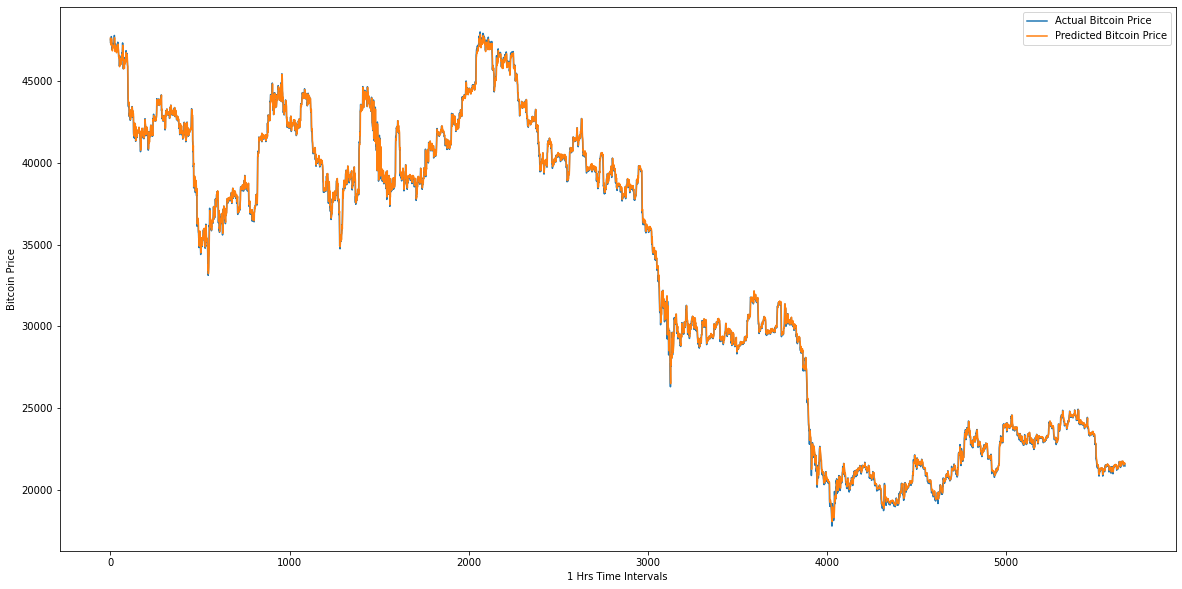

Test data RMSE:  280.8288242594462
Test data MSE:  78864.82853494292
Test data MAE:  172.48749080380782
Test data MAPE:  0.5331420370213463
_____________________________________
_______

(5666, 10)
(5666,)
(5666, 10, 1)
(5666, 1)
Window Size: 10 Neurons: 32



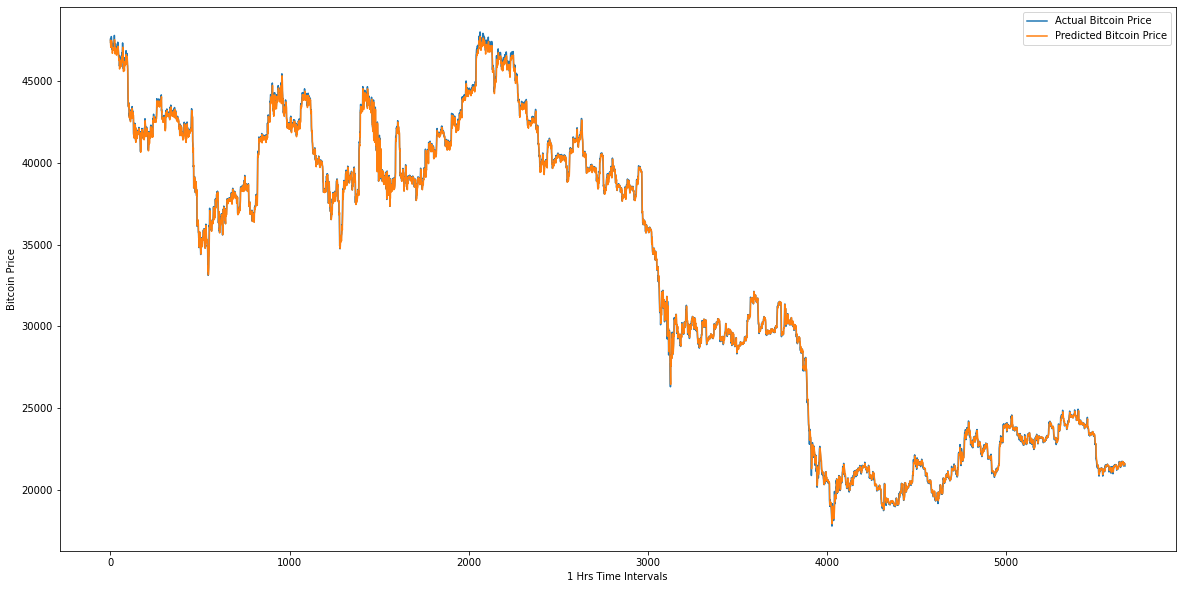

Test data RMSE:  285.55494830286085
Test data MSE:  81541.62850024953
Test data MAE:  177.90713974099896
Test data MAPE:  0.5397577030857452
_____________________________________
_______

(5666, 10)
(5666,)
(5666, 10, 1)
(5666, 1)
Window Size: 10 Neurons: 64



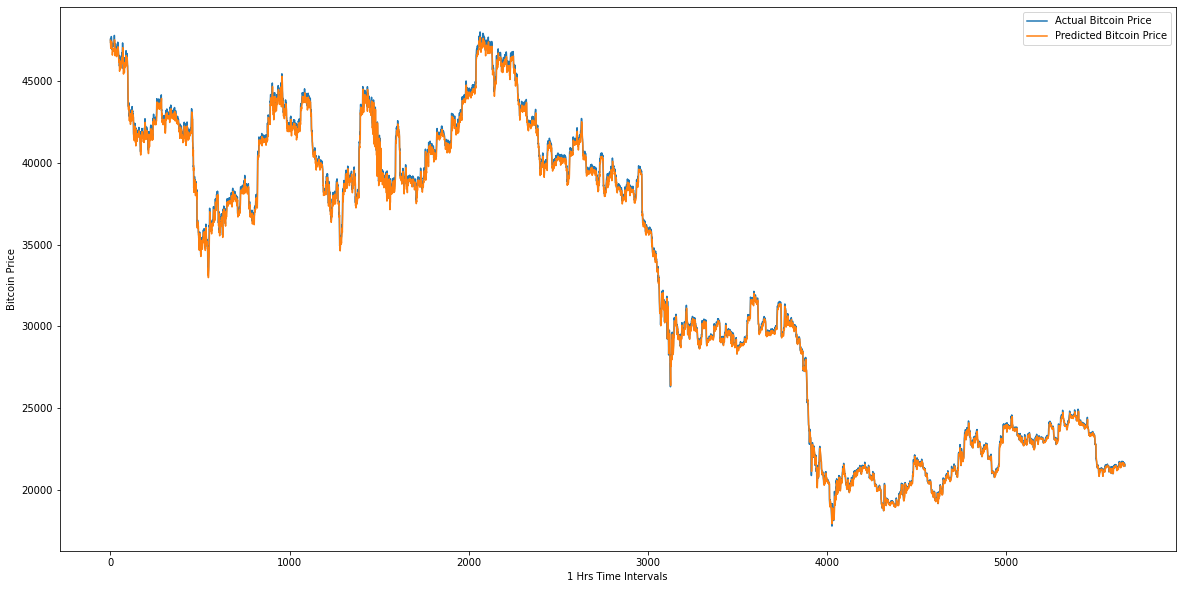

Test data RMSE:  322.18692832311314
Test data MSE:  103804.41678228285
Test data MAE:  223.33794706891987
Test data MAPE:  0.6575818284320208
_____________________________________
_______

(5666, 10)
(5666,)
(5666, 10, 1)
(5666, 1)
Window Size: 10 Neurons: 128



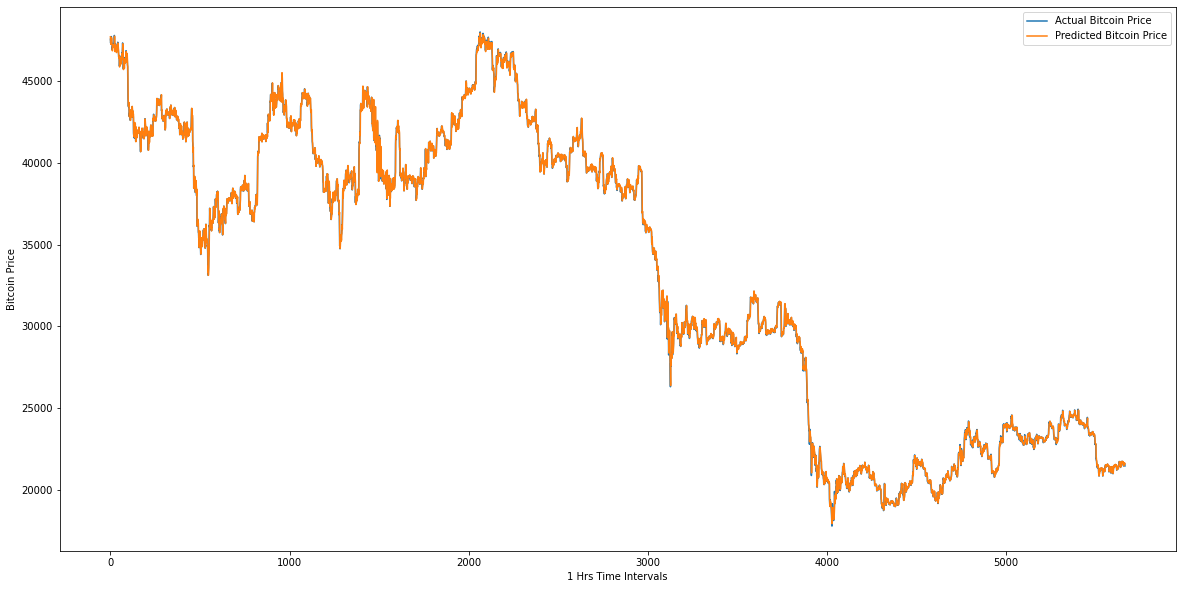

Test data RMSE:  278.00552775282705
Test data MSE:  77287.0734611279
Test data MAE:  168.58364810878487
Test data MAPE:  0.516432687907736
_____________________________________
_______

(5661, 15)
(5661,)
(5661, 15, 1)
(5661, 1)
Window Size: 15 Neurons: 8



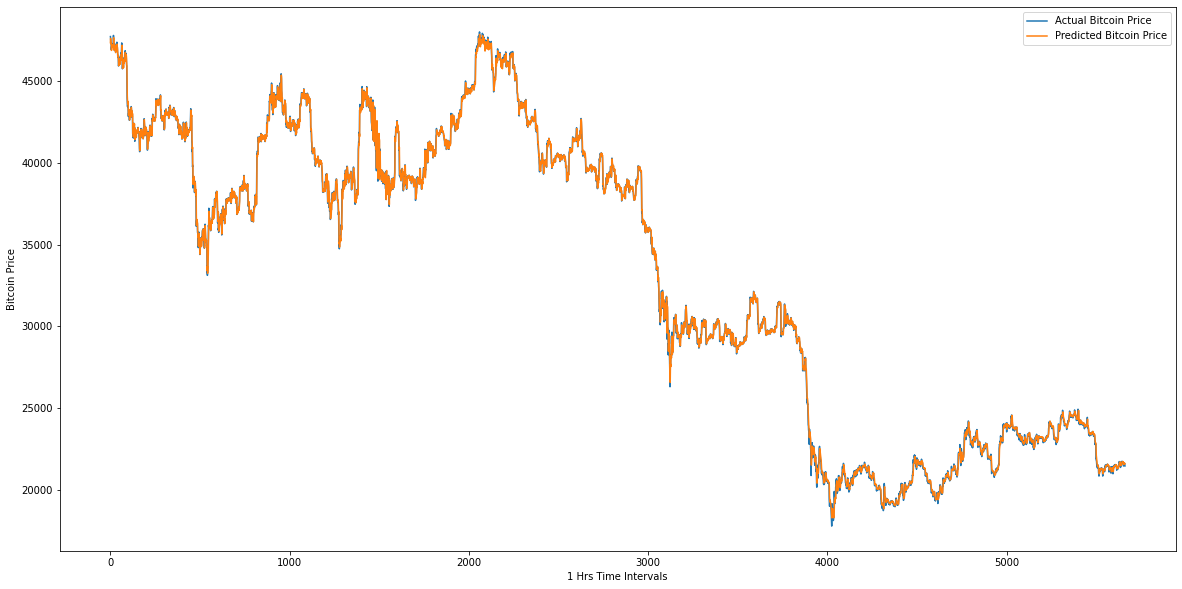

Test data RMSE:  283.7975369995976
Test data MSE:  80541.04200703795
Test data MAE:  172.81747711855235
Test data MAPE:  0.5375908160280188
_____________________________________
_______

(5661, 15)
(5661,)
(5661, 15, 1)
(5661, 1)
Window Size: 15 Neurons: 16



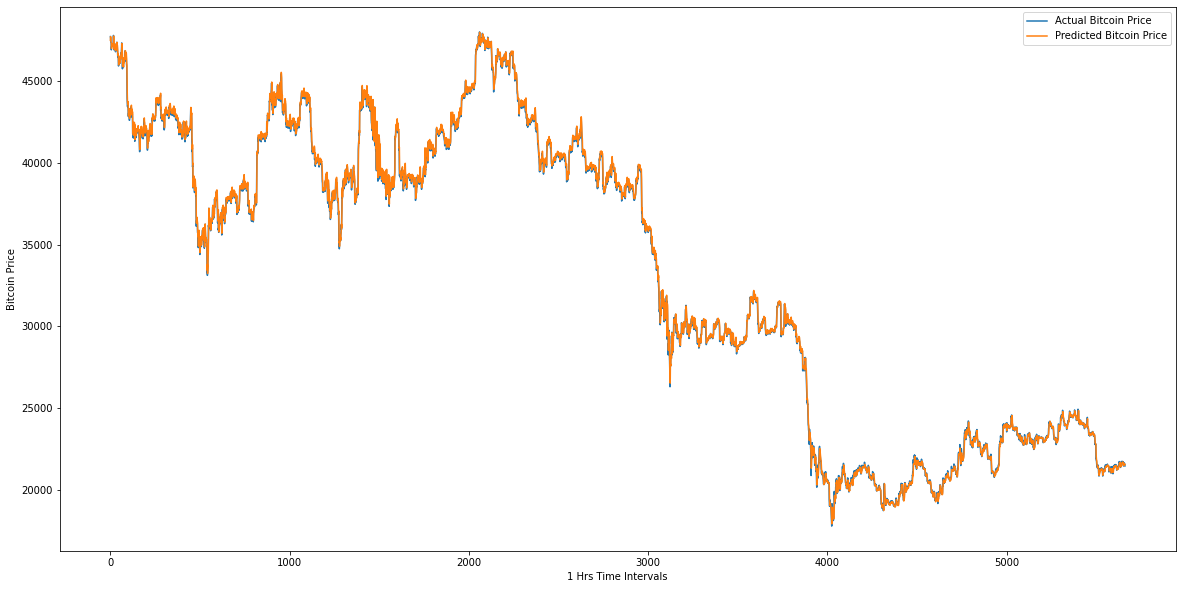

Test data RMSE:  289.93049768838193
Test data MSE:  84059.69348983283
Test data MAE:  182.12421646595126
Test data MAPE:  0.5572761636972948
_____________________________________
_______

(5661, 15)
(5661,)
(5661, 15, 1)
(5661, 1)
Window Size: 15 Neurons: 32



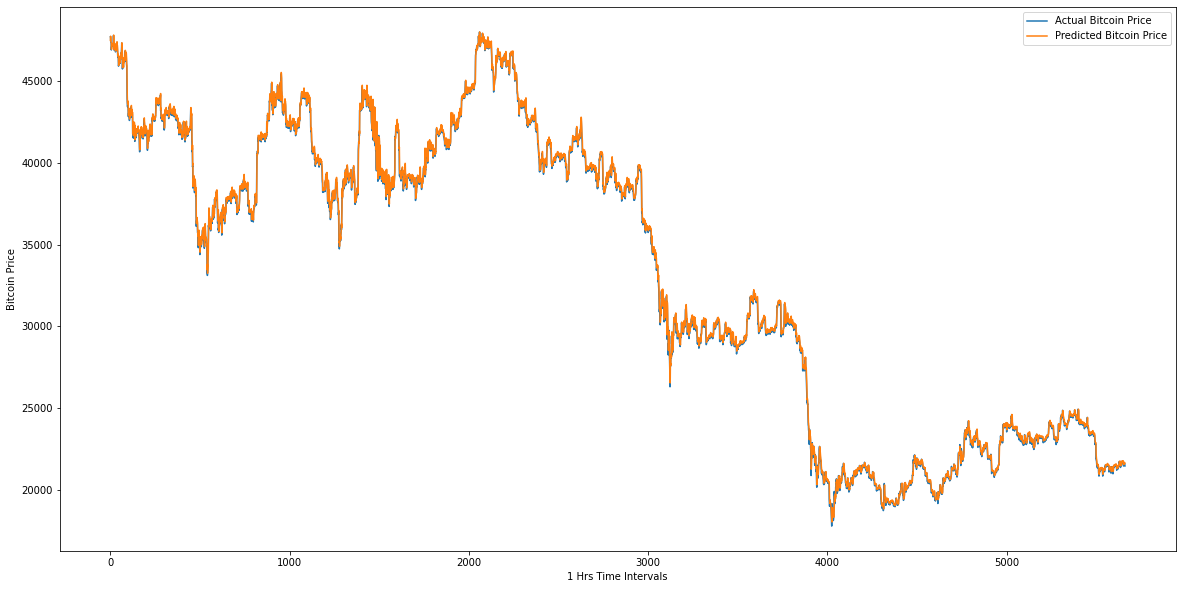

Test data RMSE:  292.42838000806097
Test data MSE:  85514.35743413892
Test data MAE:  186.75046990416888
Test data MAPE:  0.5773640291120794
_____________________________________
_______

(5661, 15)
(5661,)
(5661, 15, 1)
(5661, 1)
Window Size: 15 Neurons: 64



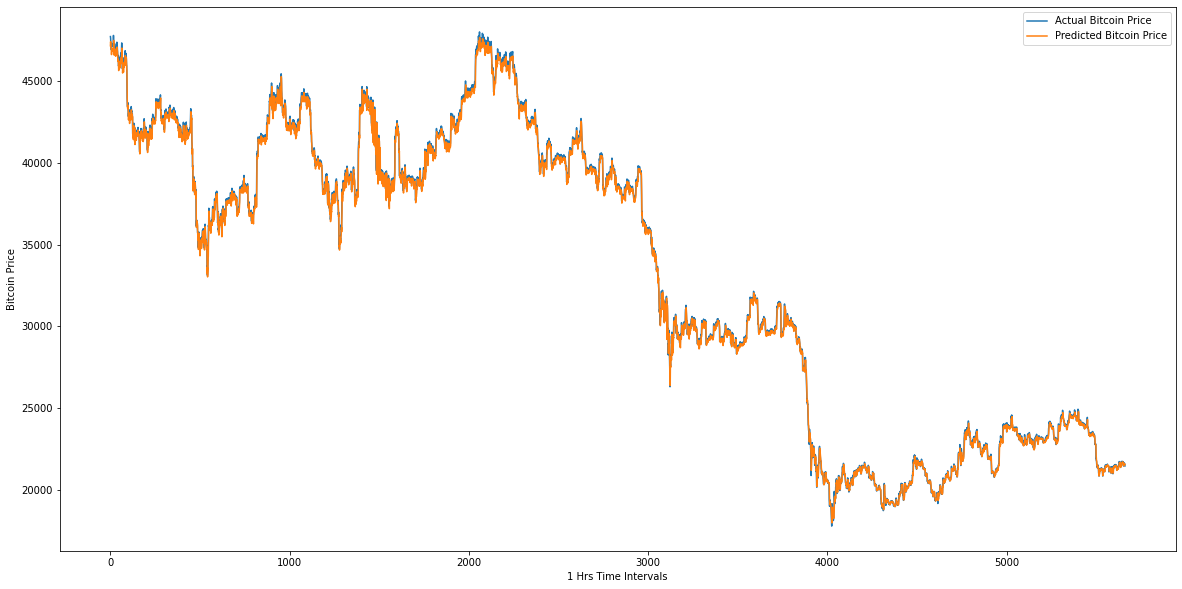

Test data RMSE:  308.2017672010933
Test data MSE:  94988.3293058769
Test data MAE:  206.6503703920465
Test data MAPE:  0.615219913427683
_____________________________________
_______

(5661, 15)
(5661,)
(5661, 15, 1)
(5661, 1)
Window Size: 15 Neurons: 128



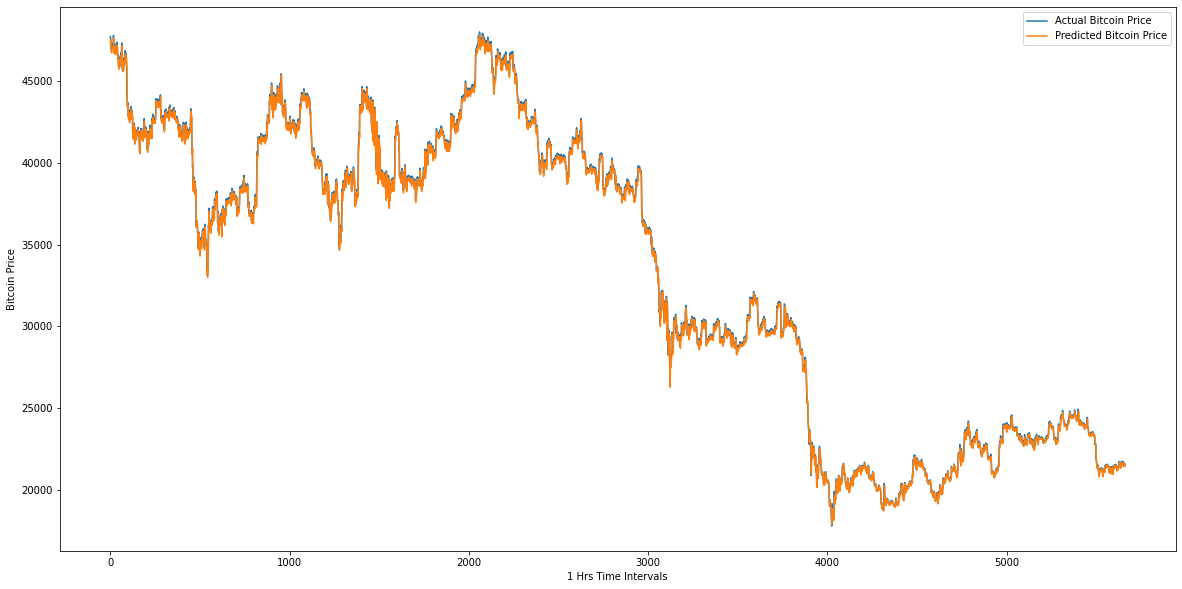

Test data RMSE:  299.6870253428815
Test data MSE:  89812.31315886488
Test data MAE:  198.72920347796327
Test data MAPE:  0.600101123831961
_____________________________________
_______

(5656, 20)
(5656,)
(5656, 20, 1)
(5656, 1)
Window Size: 20 Neurons: 8



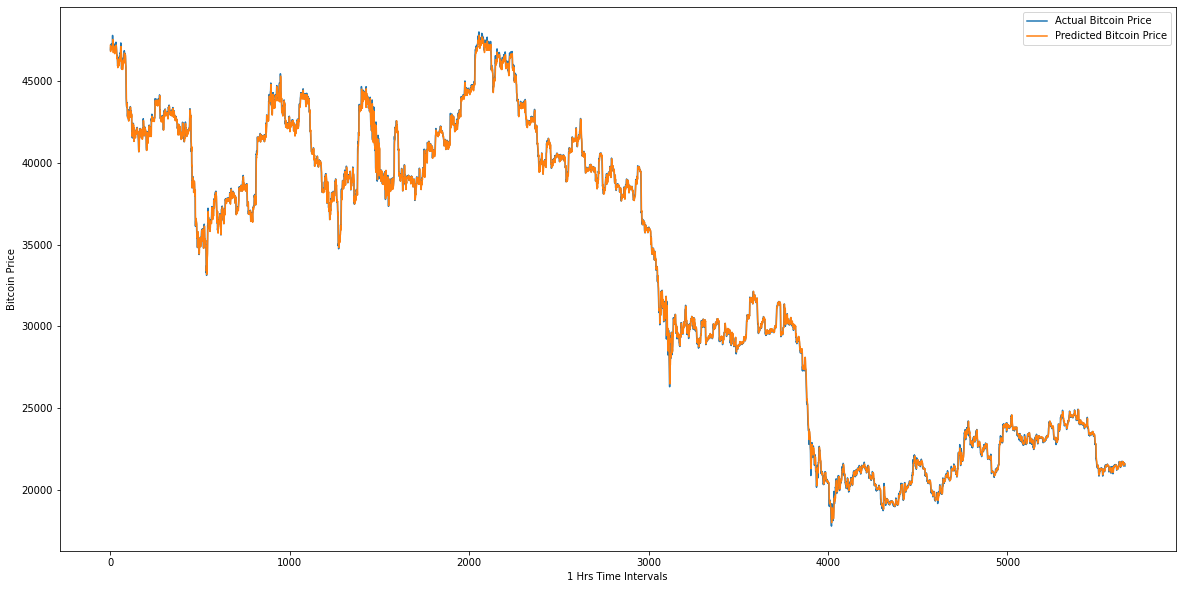

Test data RMSE:  282.0743935761354
Test data MSE:  79565.96351134453
Test data MAE:  173.9530063180693
Test data MAPE:  0.5357990002128884
_____________________________________
_______

(5656, 20)
(5656,)
(5656, 20, 1)
(5656, 1)
Window Size: 20 Neurons: 16



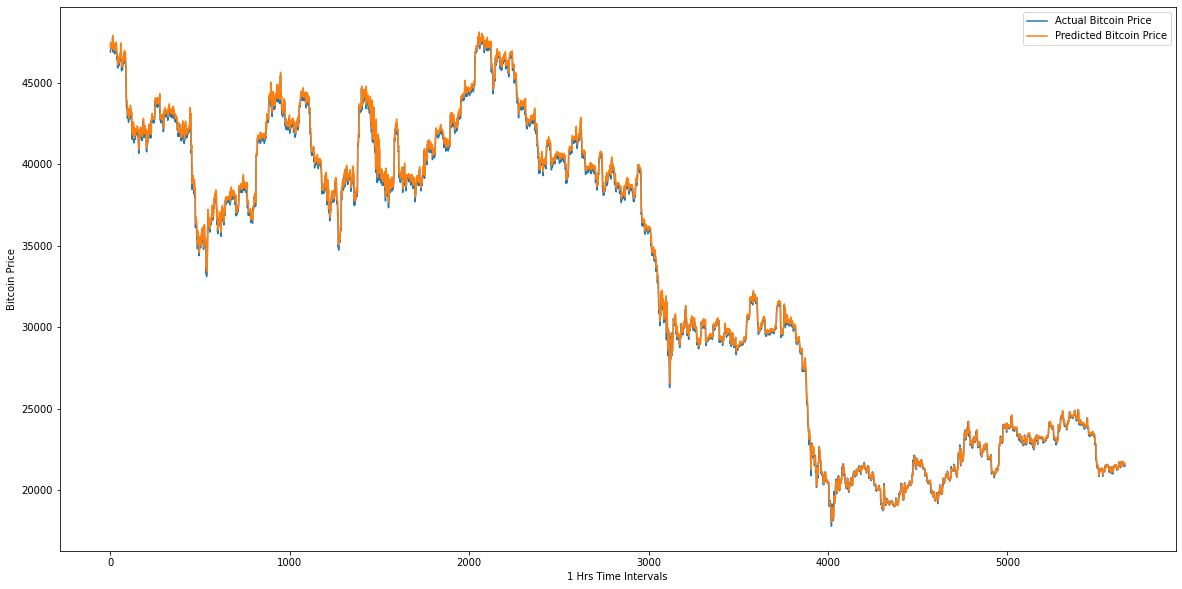

Test data RMSE:  320.0227588805677
Test data MSE:  102414.56620153
Test data MAE:  216.0308281947268
Test data MAPE:  0.6438289657448801
_____________________________________
_______

(5656, 20)
(5656,)
(5656, 20, 1)
(5656, 1)
Window Size: 20 Neurons: 32



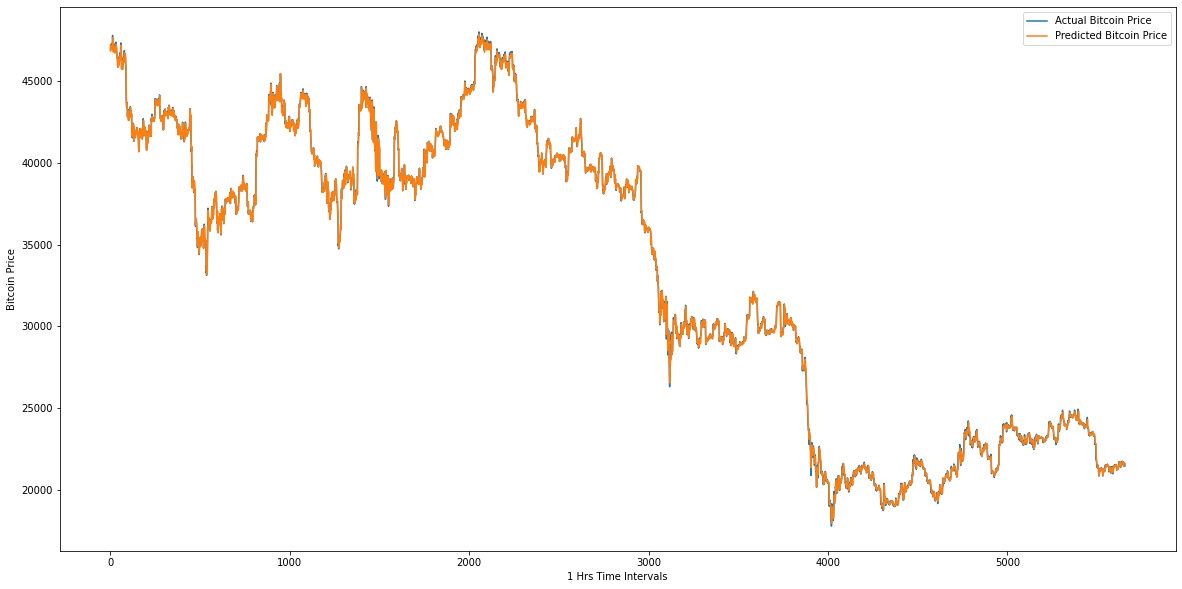

Test data RMSE:  280.1820587341351
Test data MSE:  78501.98603649833
Test data MAE:  171.26659318577617
Test data MAPE:  0.5273777544501358
_____________________________________
_______

(5656, 20)
(5656,)
(5656, 20, 1)
(5656, 1)
Window Size: 20 Neurons: 64



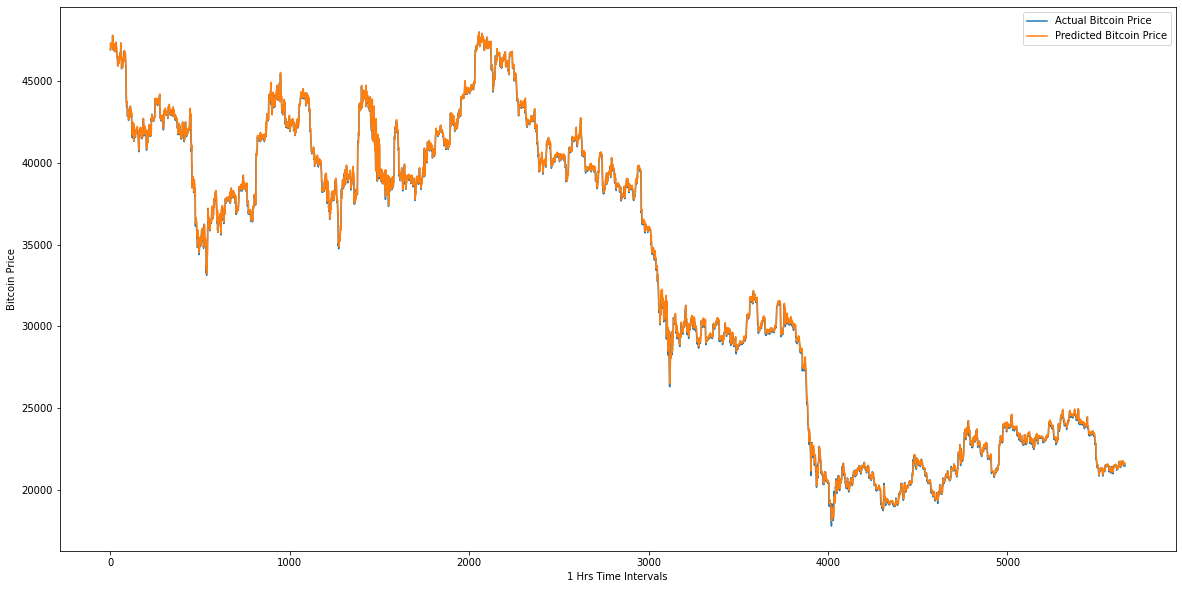

Test data RMSE:  284.5637214799399
Test data MSE:  80976.51158251279
Test data MAE:  176.1174726512774
Test data MAPE:  0.5439162829680299
_____________________________________
_______

(5656, 20)
(5656,)
(5656, 20, 1)
(5656, 1)
Window Size: 20 Neurons: 128



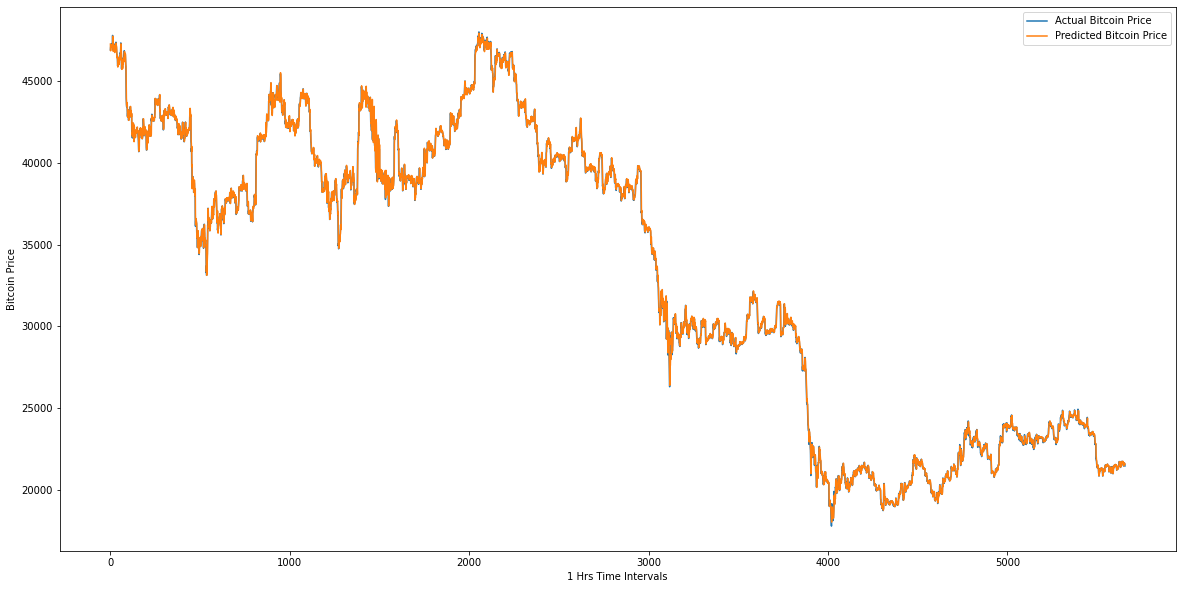

Test data RMSE:  278.9264153297361
Test data MSE:  77799.94516869642
Test data MAE:  169.30334505204652
Test data MAPE:  0.5191118489021954
_____________________________________
_______

(5651, 25)
(5651,)
(5651, 25, 1)
(5651, 1)
Window Size: 25 Neurons: 8



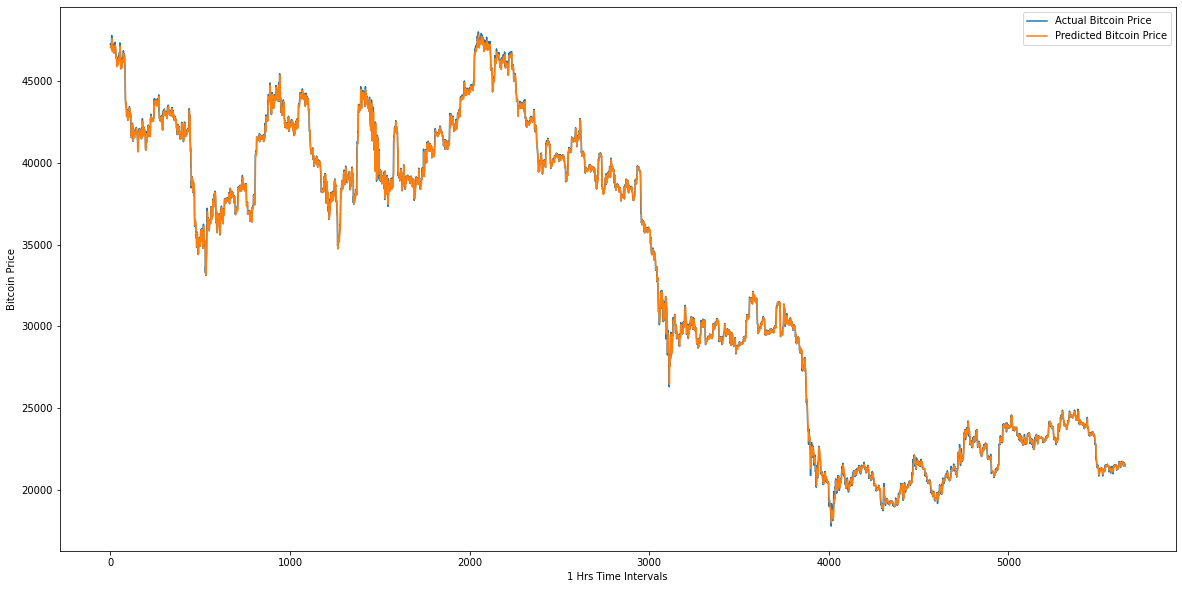

Test data RMSE:  281.33857497944746
Test data MSE:  79151.39377146619
Test data MAE:  174.31015260064592
Test data MAPE:  0.5375052632815022
_____________________________________
_______

(5651, 25)
(5651,)
(5651, 25, 1)
(5651, 1)
Window Size: 25 Neurons: 16



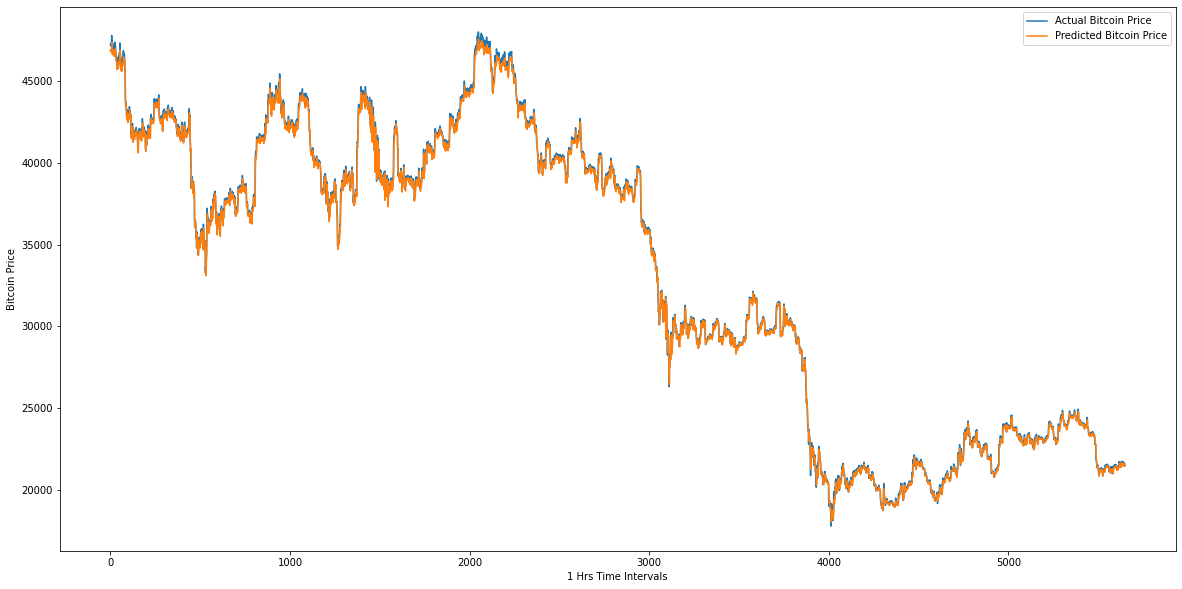

Test data RMSE:  307.274628634246
Test data MSE:  94417.6974023138
Test data MAE:  207.84162257023095
Test data MAPE:  0.6242666120981346
_____________________________________
_______

(5651, 25)
(5651,)
(5651, 25, 1)
(5651, 1)
Window Size: 25 Neurons: 32



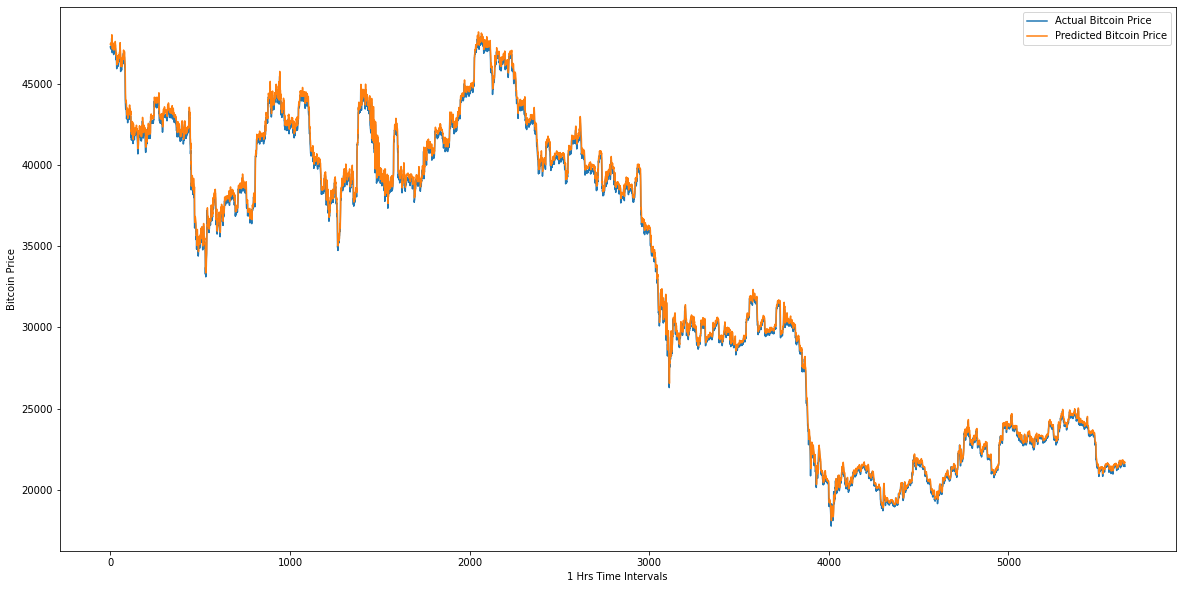

Test data RMSE:  355.39584512483776
Test data MSE:  126306.20673199766
Test data MAE:  263.1665649893824
Test data MAPE:  0.796047278576577
_____________________________________
_______

(5651, 25)
(5651,)
(5651, 25, 1)
(5651, 1)
Window Size: 25 Neurons: 64



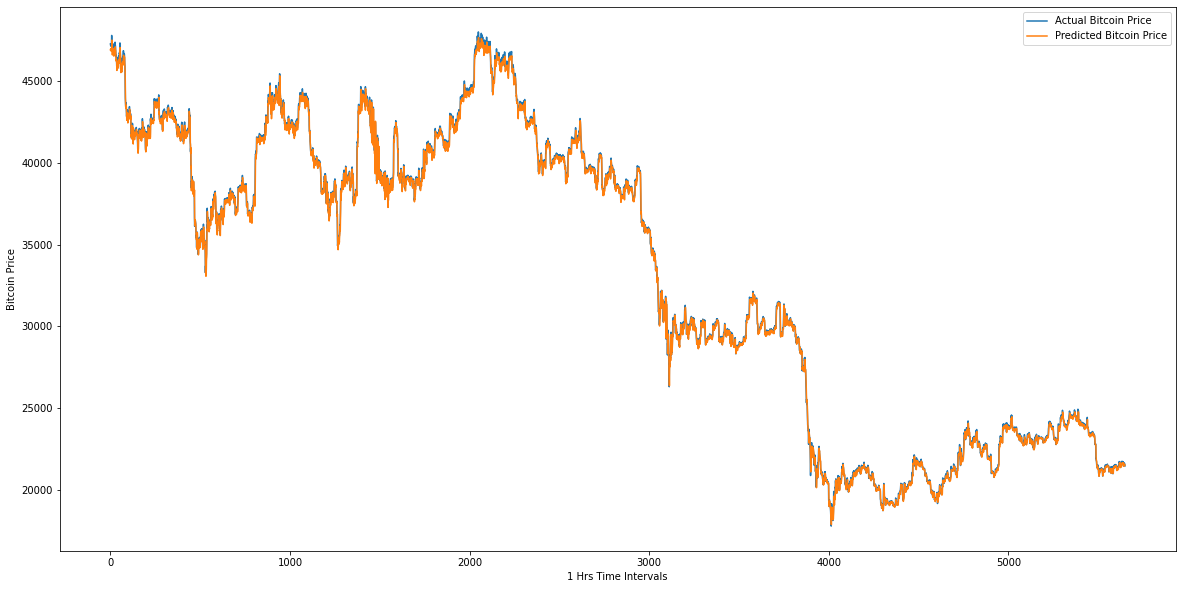

Test data RMSE:  299.4104492487924
Test data MSE:  89646.61711936368
Test data MAE:  196.9835556621616
Test data MAPE:  0.5928618523513354
_____________________________________
_______

(5651, 25)
(5651,)
(5651, 25, 1)
(5651, 1)
Window Size: 25 Neurons: 128



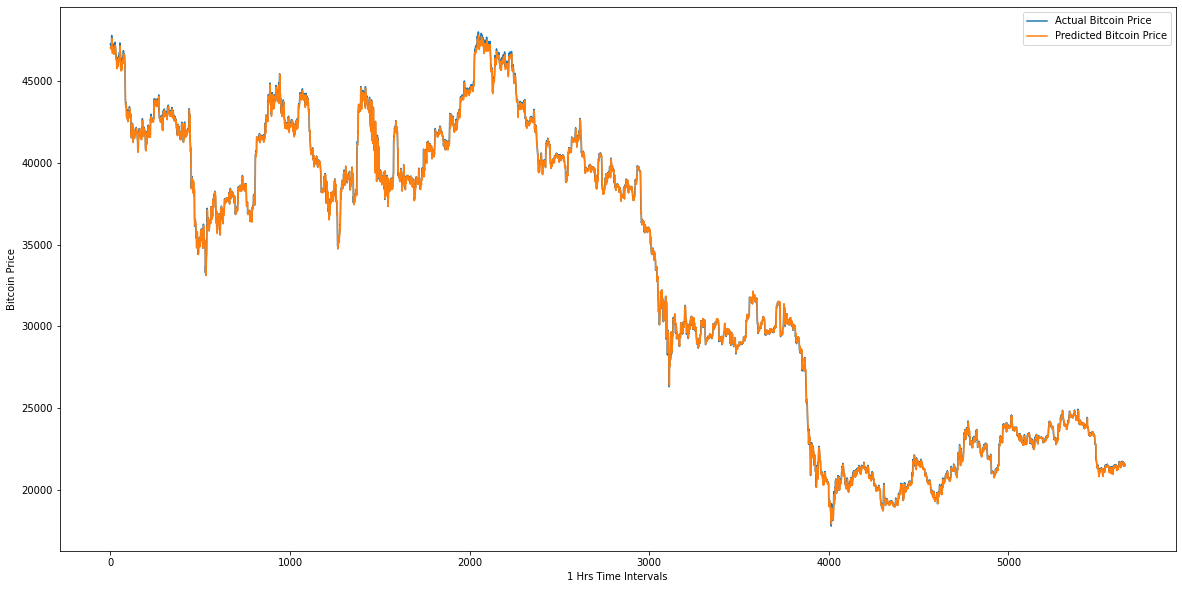

Test data RMSE:  282.0218208753947
Test data MSE:  79536.30744987322
Test data MAE:  174.88584262851708
Test data MAPE:  0.5332425928969421
_____________________________________
_______



In [ ]:
ws = 5

tot_err = []
total_error = [['Window Size', 'Neuron', 'RMSE', 'MSE', 'MAE', 'MAPE']]
for i in range(val_i):
  nn = 8
  
  for j in range(val_j):
    model = load_model(f'/content/gdrive/MyDrive/Thesis/Models/CNN_LSTM_Model_WS{ws}_Neuron{nn}.h5')
    col = test_model(ws, model, nn)
    
    print('_______')
    print('')
    nn=nn*2
    total_error.append(col)
  #tor_err.append()
  ws = ws+5

In [ ]:
dff = pd.DataFrame(total_error)
dff

,0,1,2,3,4,5
0,Window Size,Neuron,RMSE,MSE,MAE,MAPE
1,5,8,288.91162,83469.924251,185.186899,0.565296
2,5,16,282.294799,79690.35364,174.721335,0.540268
3,5,32,299.648222,89789.05706,198.856788,0.601792
4,5,64,362.244435,131221.030998,269.97815,0.809802
5,5,128,279.141774,77920.129743,171.151976,0.523621
6,10,8,292.139977,85345.766384,189.639086,0.581078
7,10,16,280.828824,78864.828535,172.487491,0.533142
8,10,32,285.554948,81541.6285,177.90714,0.539758
9,10,64,322.186928,103804.416782,223.337947,0.657582


In [ ]:
dff.to_csv('CNN_LSTM_Errors.csv')

In [ ]:
tot_err = []

for i in range(1,(val_i*val_j+1)):
  col = []
  for j in range(6):
    if j==5:
      col.append(total_error[i][j])
  tot_err.append(col)

In [ ]:
tt=np.zeros(shape=(val_i,val_j))
k=0
for i in range(val_i):
  for j in range(val_j):
    tt[i][j] = tot_err[k][0]
    k=k+1

In [ ]:
tt

array([[0.56529566, 0.5402684 , 0.60179236, 0.80980163, 0.52362129],
       [0.58107808, 0.53314204, 0.5397577 , 0.65758183, 0.51643269],
       [0.53759082, 0.55727616, 0.57736403, 0.61521991, 0.60010112],
       [0.535799  , 0.64382897, 0.52737775, 0.54391628, 0.51911185],
       [0.53750526, 0.62426661, 0.79604728, 0.59286185, 0.53324259]])

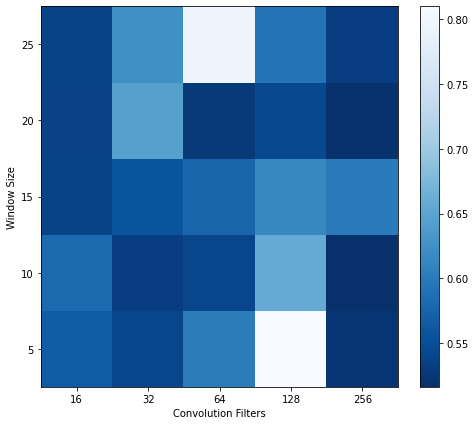

In [ ]:
Z = np.array(tt)
#x = np.array([1,2,3,4,5])
x = np.array([0.5,1.5,2.5,3.5,4.5])

plt.figure(figsize = (8, 7))
plt.pcolormesh(Z, cmap = "Blues_r")
my_yticks = ['5', '10', '15', '20', '25']
my_xticks = ['16', '32', '64', '128', '256']
plt.xticks(x, my_xticks)
plt.yticks(x, my_yticks)
plt.ylabel("Window Size")
plt.xlabel("Convolution Filters")
plt.colorbar()
plt.show()